In [151]:
import os
import pandas as pd

AIRBNB_PATH = os.path.join("datasets", "airbnb_ny")

def load_airbnb_data(airbnb_path=AIRBNB_PATH):
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

In [152]:
airbnb = load_airbnb_data()
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [153]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [154]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [155]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [156]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


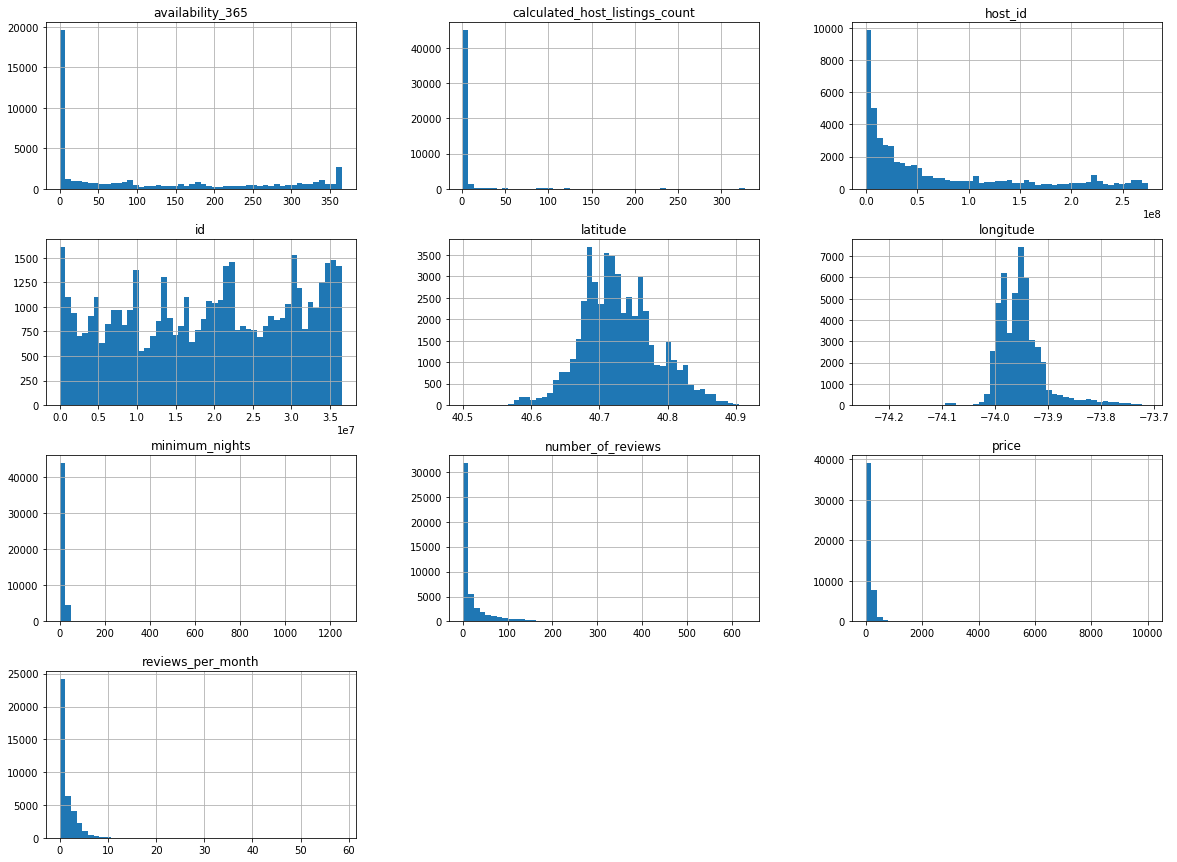

In [157]:
%matplotlib inline 
import matplotlib.pyplot as plt
airbnb.hist(bins=50, figsize=(20,15))
plt.show()

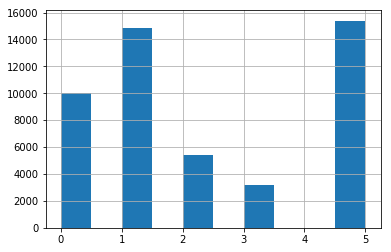

In [158]:
import numpy as np

airbnb = airbnb.drop('id', axis=1)
airbnb = airbnb.drop('host_id', axis=1)
airbnb = airbnb.drop('host_name', axis=1)
airbnb = airbnb.drop('name', axis=1)
airbnb = airbnb.drop('last_review', axis=1)

airbnb['reviews_cat'] = np.ceil(airbnb['number_of_reviews']/5.0)
airbnb['reviews_cat'].where(airbnb['reviews_cat'] < 4, 5.0, inplace=True)
airbnb['reviews_cat'].hist()

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit

split =  StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb['reviews_cat']):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]
    
strat_test_set['reviews_cat'].value_counts() / len(strat_test_set)

5.0    0.314756
1.0    0.303508
0.0    0.205542
2.0    0.111054
3.0    0.065140
Name: reviews_cat, dtype: float64

In [160]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('reviews_cat', axis=1, inplace=True)

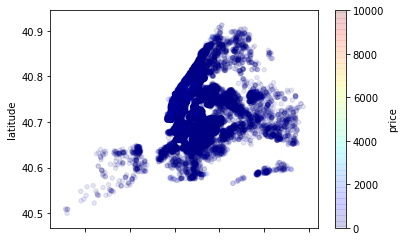

In [161]:
airbnb = strat_train_set.copy()
airbnb.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
           c='price', cmap=plt.get_cmap('jet'), colorbar=True)

In [162]:
corr_matrix = airbnb.corr()
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.082339
calculated_host_listings_count    0.060149
minimum_nights                    0.045813
latitude                          0.035896
reviews_per_month                -0.037813
number_of_reviews                -0.049175
longitude                        -0.155742
Name: price, dtype: float64

In [222]:
airbnb = strat_train_set.drop('price', axis=1)
airbnb_labels = strat_train_set['price'].copy()

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 29300 to 41655
Data columns (total 10 columns):
neighbourhood_group               39116 non-null object
neighbourhood                     39116 non-null object
latitude                          39116 non-null float64
longitude                         39116 non-null float64
room_type                         39116 non-null object
minimum_nights                    39116 non-null int64
number_of_reviews                 39116 non-null int64
reviews_per_month                 31074 non-null float64
calculated_host_listings_count    39116 non-null int64
availability_365                  39116 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.3+ MB


In [223]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, labels):
        self.labels = labels
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_with_labels = np.c_[X, self.labels.values]
        lcf = LocalOutlierFactor()
        lcf.fit(X_with_labels)
        return X_with_labels[lcf.negative_outlier_factor_ > -10.0, :]

In [224]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

airbnb_num_attr = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
airbnb_cat_attr = ['neighbourhood_group', 'neighbourhood', 'room_type']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(airbnb_num_attr)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(airbnb_cat_attr)),
    ('cat_encoder', OneHotEncoder(sparse=False)),    
])

union_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

full_pipeline = Pipeline([
    ('union', union_pipeline),
    ('outlier_ext', OutlierExtractor(airbnb_labels)),
])

airbnb_prepared_w_label = full_pipeline.fit_transform(airbnb)
airbnb_labels = airbnb_prepared_w_label[:, -1] 
airbnb_prepared = airbnb_prepared_w_label[:, :-1] 

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

airbnb_predictions = lin_reg.predict(airbnb_prepared)
lin_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

218.174209097524

In [226]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(airbnb_prepared, airbnb_labels)

airbnb_predictions = forest_reg.predict(airbnb_prepared)
forest_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

81.1877477142147

In [227]:
def display_scores(scores):
    print('scores:', scores)
    print('mean:', scores.mean())
    print('std:', scores.std())


from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels, 
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [251.89985286 213.52016308 166.76307809 266.90358992 219.53486362
 212.57849397 249.85788154 222.8936831  143.47579693 176.1466657 ]
mean: 212.35740688234142
std: 37.74101666019453
